# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

It is used to discover patterns in the visual data. Such as the camera of a self driving car recognizing the cars in front

## Get the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-09-22 01:59:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  61.4MB/s    in 1.7s    

2022-09-22 01:59:24 (61.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
# get the number of files
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in pizza_steak.
There are 2 directories and 0 files in pizza_steak/train.
There are 0 directories and 750 files in pizza_steak/train/steak.
There are 0 directories and 750 files in pizza_steak/train/pizza.
There are 2 directories and 0 files in pizza_steak/test.
There are 0 directories and 250 files in pizza_steak/test/steak.
There are 0 directories and 250 files in pizza_steak/test/pizza.


In [6]:
# Another way to find the len using listdir
num_steak_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_train

750

> There are 750 images of pizza and 750 images of steak in train dataset
> There are 250 images of pizza and 250 images of steak in test dataset

## Get the classnames programatically

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Plot the image
  img = mpimage.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


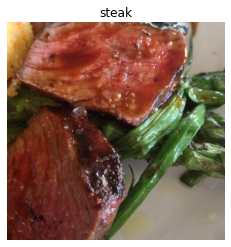

In [9]:
img = view_random_image("pizza_steak/train/", "steak")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[246, 224, 141],
        [246, 224, 141],
        [249, 222, 141],
        ...,
        [189, 179, 169],
        [189, 179, 169],
        [191, 178, 169]],

       [[254, 233, 152],
        [253, 230, 150],
        [252, 227, 145],
        ...,
        [189, 179, 169],
        [189, 179, 169],
        [191, 178, 169]],

       [[255, 240, 161],
        [255, 238, 159],
        [255, 234, 153],
        ...,
        [189, 179, 169],
        [189, 179, 169],
        [191, 178, 169]],

       ...,

       [[ 48,  14,  13],
        [ 47,  13,  12],
        [ 47,  13,  12],
        ...,
        [147, 137, 127],
        [146, 136, 126],
        [146, 136, 126]],

       [[ 47,  13,  12],
        [ 47,  13,  12],
        [ 48,  14,  13],
        ...,
        [148, 138, 128],
        [148, 138, 128],
        [147, 137, 127]],

       [[ 47,  13,  12],
        [ 48,  14,  13],
        [ 49,  15,  14],
        ...,
        [149, 139, 12

In [11]:
# normalize the values into 0 and 1
img/255.

array([[[0.96470588, 0.87843137, 0.55294118],
        [0.96470588, 0.87843137, 0.55294118],
        [0.97647059, 0.87058824, 0.55294118],
        ...,
        [0.74117647, 0.70196078, 0.6627451 ],
        [0.74117647, 0.70196078, 0.6627451 ],
        [0.74901961, 0.69803922, 0.6627451 ]],

       [[0.99607843, 0.91372549, 0.59607843],
        [0.99215686, 0.90196078, 0.58823529],
        [0.98823529, 0.89019608, 0.56862745],
        ...,
        [0.74117647, 0.70196078, 0.6627451 ],
        [0.74117647, 0.70196078, 0.6627451 ],
        [0.74901961, 0.69803922, 0.6627451 ]],

       [[1.        , 0.94117647, 0.63137255],
        [1.        , 0.93333333, 0.62352941],
        [1.        , 0.91764706, 0.6       ],
        ...,
        [0.74117647, 0.70196078, 0.6627451 ],
        [0.74117647, 0.70196078, 0.6627451 ],
        [0.74901961, 0.69803922, 0.6627451 ]],

       ...,

       [[0.18823529, 0.05490196, 0.05098039],
        [0.18431373, 0.05098039, 0.04705882],
        [0.18431373, 0

- Instead of doing one example at a time, it will be better to do an end to end example
1. Load images
2. Preprocess images
3. Build a CNN to build patterns in our images
4. Compile our CNN
4. Fit the CNN to our training dataset

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Preprocess the data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

# Build the model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu"
    ),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    tf.keras.layers.Conv2D(
        10,
        3,
        activation="relu"
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=2
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, "sigmoid")
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 201ms/step - loss: 0.5996 - accuracy: 0.6740 - val_loss: 0.5056 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4319 - accuracy: 0.8093 - val_loss: 0.3354 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4036 - accuracy: 0.8233 - val_loss: 0.3619 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3548 - accuracy: 0.8580 - val_loss: 0.3043 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3199 - accuracy: 0.8753 - val_loss: 0.2984 - val_accuracy: 0.8740


> Epoch 1/5
47/47 [==============================] - 107s 2s/step - loss: 0.5482 - accuracy: 0.7247 - val_loss: 0.4348 - val_accuracy: 0.7820
- Takes a lot of time to train because of no accelerator

## Using the model from tensorflow playground

In [13]:
# Set the random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 2.1564 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
# Upgrade the previous model
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 4.5819 - accuracy: 0.6380 - val_loss: 0.7198 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6622 - accuracy: 0.7100 - val_loss: 0.6469 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6657 - accuracy: 0.7080 - val_loss: 0.7796 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5035 - accuracy: 0.7700 - val_loss: 0.5252 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6170 - accuracy: 0.7340 - val_loss: 0.4709 - val_accuracy: 0.7640


## Comparing parameters for each model

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification
1. Becoming one with data (Visualize)
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Becoming one with data

Image shape: (512, 512, 3)
Image shape: (306, 512, 3)


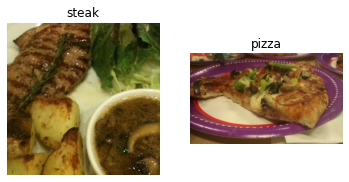

In [18]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


## Preprocess the data (Scaling / Normalization)

In [19]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next step is to turn our data into **batches**

In [20]:
!nvidia-smi

Thu Sep 22 02:02:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    25W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Loading all the train data images into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="binary",
    seed=42,
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# View the first batch
images, labels = train_data.next()

### Create a CNN model (start with a baseline)

A baseline is a relatively simple model that we start at the beginning

In [24]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding="valid",
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [25]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 1.0425 - accuracy: 0.4847 - val_loss: 0.6932 - val_accuracy: 0.4880
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6637 - accuracy: 0.5613 - val_loss: 0.5318 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.5155 - accuracy: 0.7367 - val_loss: 0.4971 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4666 - accuracy: 0.7767 - val_loss: 0.4624 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3364 - accuracy: 0.8680 - val_loss: 0.4752 - val_accuracy: 0.7660


## 5.Evaluating our model


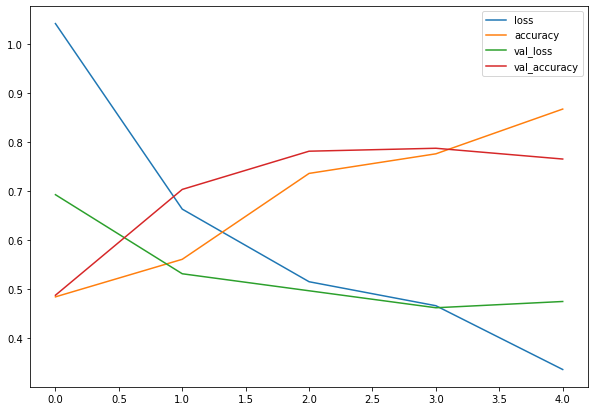

In [27]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [36]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  
  # plot the loss curve
  plt.figure()
  plt.plot(epochs, loss, label="Traingin loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss curves")
  plt.xlabel("Epochs")
  plt.legend();

  # plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Traingin Accuracy")
  plt.plot(epochs, val_accuracy, label="Validation Accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.legend();

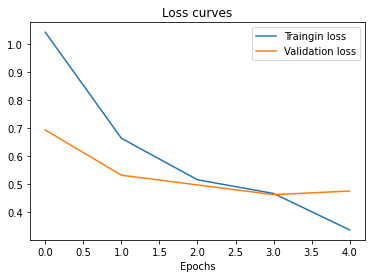

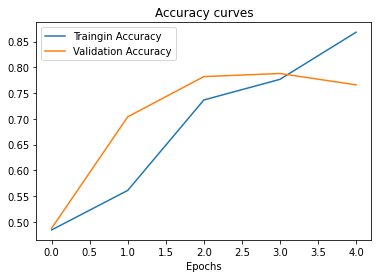

In [37]:
plot_loss_curves(history_4)

- As you can see the validation loss is increasing, this means the model may be overfitting the training dataset

### Reduce Overfitting
- Data Augmentation
- Add regularization layers such as MaxPool2D
- Add more data

## Reducing overfitting by MaxPool2D

In [38]:
# create a new model
tf.random.set_seed(42)

# Build the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [39]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 0.5694 - accuracy: 0.7140 - val_loss: 0.4820 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4821 - accuracy: 0.7687 - val_loss: 0.4005 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4374 - accuracy: 0.7940 - val_loss: 0.3517 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3857 - accuracy: 0.8260 - val_loss: 0.3560 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3735 - accuracy: 0.8420 - val_loss: 0.3211 - val_accuracy: 0.8600


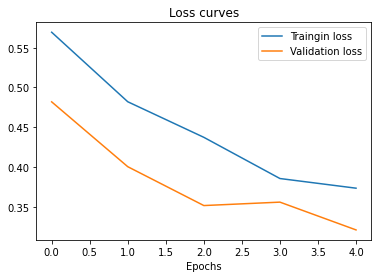

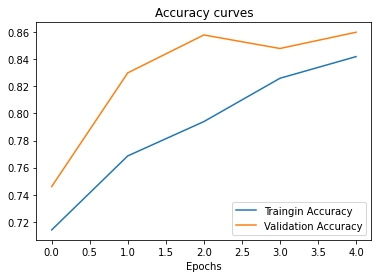

In [40]:
# Plot loss curves
plot_loss_curves(history_5)

In [41]:
# evaluate the model
model_5.evaluate(test_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.3211 - accuracy: 0.8600


[0.32110264897346497, 0.8600000143051147]

## Reduce Overfitting by Data Augmentation

> Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns.
- Altering might mean rotating, shifting, flipping or something else

In [42]:
# Create image data generator with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

### Visualize data augmentation

In [43]:
 # Create an augmented training data
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Create non augmented training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Create test data 
test_data = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [44]:
# Plot the images
images, labels = train_data.next()
images_augmented, labels_augmented = train_data_augmented.next()


(-0.5, 223.5, 223.5, -0.5)

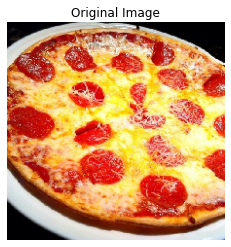

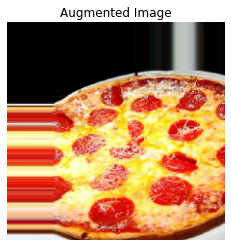

In [46]:
import random
random_number = random.randint(0, 32)
plt.figure()
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")

plt.figure()
plt.imshow(images_augmented[random_number])
plt.title("Augmented Image")
plt.axis("Off")

### Build a model on augmented data

In [47]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 536ms/step - loss: 0.7245 - accuracy: 0.5273 - val_loss: 0.6901 - val_accuracy: 0.5160
Epoch 2/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6925 - accuracy: 0.5113 - val_loss: 0.6881 - val_accuracy: 0.6533
Epoch 3/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6922 - accuracy: 0.5080 - val_loss: 0.6813 - val_accuracy: 0.6907
Epoch 4/5
47/47 [==============================] - 27s 579ms/step - loss: 0.6816 - accuracy: 0.6380 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6881 - accuracy: 0.5667 - val_loss: 0.6270 - val_accuracy: 0.6907


### Building a model with augmented data and shuffled

In [48]:
 # Create an augmented training data
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

# Create non augmented training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

# Create test data 
test_data = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [49]:
# Build the model
# set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 535ms/step - loss: 0.6452 - accuracy: 0.6260 - val_loss: 0.6276 - val_accuracy: 0.6213
Epoch 2/5
47/47 [==============================] - 25s 544ms/step - loss: 0.5741 - accuracy: 0.6973 - val_loss: 0.4506 - val_accuracy: 0.8047
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5019 - accuracy: 0.7553 - val_loss: 0.4045 - val_accuracy: 0.8293
Epoch 4/5
47/47 [==============================] - 25s 531ms/step - loss: 0.4900 - accuracy: 0.7633 - val_loss: 0.4027 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 25s 545ms/step - loss: 0.4870 - accuracy: 0.7707 - val_loss: 0.3952 - val_accuracy: 0.8320


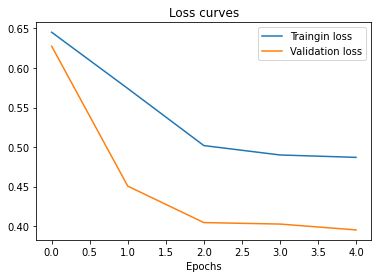

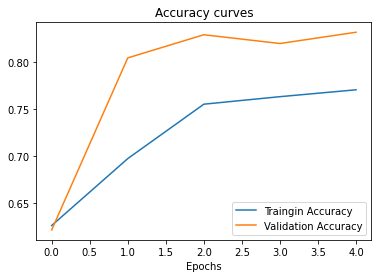

In [50]:
plot_loss_curves(history_7)

## Ways to improve the model

- Adding the layers
- increase the number of filters
- Train for longer
- Find an ideal learning rate
- Get more data
- transfer learning

## Making a prediction with our trained data on some custom image

--2022-09-22 03:28:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-09-22 03:28:52 (220 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



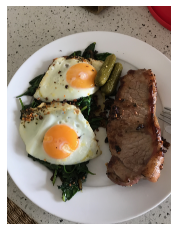

In [52]:
# View our example image
import matplotlib.image as mpimage
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimage.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
steak.shape

(4032, 3024, 3)

In [54]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

> Image size and rescaling is required

In [55]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [56]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [60]:
# predict the image
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.6851602]], dtype=float32)

In [61]:
# converting the probabilities to class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [62]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

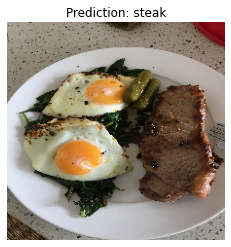

In [64]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names)